# Simple Linear Regression from Scratch - Codealong

## Introduction

In this codealong, you'll get some hands-on practice developing a simple linear regression model. In practice, you would typically use a code library rather than writing linear regression code from scratch, but this is an exercise designed to help you see what is happening "under the hood".

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Interpret the parameters of a simple linear regression model in relation to what they signify for specific data

## Simple Linear Regression Recap

Remember that the ***data*** for a simple linear regression consists of $y$ (the _dependent_ variable) and $x$ (the _independent_ variable). Then the model ***parameters*** are the slope of the line, denoted as $m$ or $\beta_1$, and the intercept ($y$ value of the line when $x$ is 0), denoted as $c$ or $\beta_0$.

Thus the overall model notation is 

$$y=mx+c$$

or, alternatively

$$y = \beta_0+ \beta_1 x $$

In the example below, $c$ is equal to 15 and $m$ is equal to 3.

In other words, the overall equation is $y=3x+15$.

<img src="images/linregall.png" width="650">

## Finding Model Parameters

If you think back to the basic algebra formulas, you might remember that slope can be calculated between two points by finding the change in y over the change in x, i.e. $\Delta y / \Delta x$. But now you are dealing with messy data rather than perfect abstractions, so your regression line is not going to represent the relationship perfectly (i.e. there is going to be some amount of _error_). The question is how to find the ***best fit*** line, rather than just calculating $\Delta y / \Delta x$.

Because these are ***estimations***, we'll use the "hat" notation for the variables, i.e.

$$\hat{y} = \hat{m} x + \hat{c}$$

or

$$\hat{y} = \hat{\beta_0} + \hat{\beta_1} x $$

Everything in these equations represented with a "hat" (e.g. $\hat{y}$ rather than just $y$) means that it is an estimate or an approximation. The only part that is not using this notation is $x$, because we have the actual data values for the independent variable.

So, how do you find the line with the best fit? You may think that you have to try lots and lots of different lines to see which one fits best. Fortunately, this task is not as complicated as it may seem. Given some data points, **the best-fit line always has a distinct slope and y-intercept that can be calculated using simple linear algebraic approaches**.

### The Least-Squares Method

We can calculate $\hat{m}$ (the slope of the best-fit line) using this formula:

$$\hat{m} = \rho \frac{S_y}{S_x}$$

Breaking down those components, we have:

* $\hat{m}$: the estimated slope
* $\rho$: the Pearson correlation, represented by the Greek letter "Rho"
* $S_y$: the standard deviation of the y values
* $S_x$: the standard deviation of the x values

(You can visit [this Wikipedia link](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line) to get take a look into the math behind the derivation of this formula.)

Then once we have the slope value ($\hat{m}$), we can put it back into our formula $(\hat{y} = \hat{m} x + \hat{c})$ to calculate the intercept. The idea is that

$$\bar{y} = \hat{c} + \hat{m} \bar{x}$$

so

$$\hat{c} = \bar{y} - \hat{m} \bar{x}$$

Breaking down those components, we have:

* $\hat{c}$: the estimated intercept
* $\bar{y}$: the mean of the y values
* $\hat{m}$: the estimated slope
* $\bar{x}$: the mean of the x values

## Let's Get Started

In the cell below, we import the necessary libraries and provide you with some toy data:

In [19]:
# Run this cell without changes

# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')

# Initialize arrays X and Y with given values
# X = Independent Variable
X = np.array([1,2,3,4,5,6,8,8,9,10], dtype=np.float64)
# Y = Dependent Variable
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)

## Scatter Plot

Before performing a linear regression analysis, it's a best practice to look at a scatter plot of the independent variable vs. the dependent variable. Linear regression is only appropriate if there is a linear relationship between them. In the cell below, create a quick scatter plot showing x vs. y.

---

<details>
    <summary style="cursor: pointer"><b>Solution code (click to reveal)</b></summary>
    
```python
plt.scatter(X, Y);
```
    
</details>

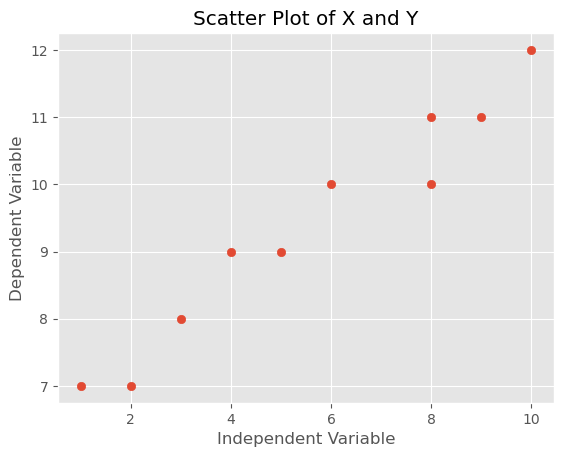

In [ ]:
# Create a scatter plot of X and Y
plt.scatter(X, Y) 
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Scatter Plot of X and Y');

Based on the plot above, does linear regression analysis seem appropriate?

---

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    <p>Yes. The relationship is very linear but not perfectly linear</p>
    <p>The best fit line should be able to explain this relationship with very low error</p>
</details>

In [ ]:
'''
Linear regression analysis seems appropriate as there is a linear relationship between the independent and dependent variables.
'''

## Calculating the Slope

Write a function `calc_slope` that returns $\hat{m}$ for a given set of x and y data.

The formula is:

$$\hat{m} = \rho \frac{S_y}{S_x}$$

Remember that you can use NumPy methods to calculate correlation and standard deviation.

---

<details>
    <summary style="cursor: pointer"><b>Solution code (click to reveal)</b></summary>
    
```python
def calc_slope(x_vals, y_vals):
    # setting up components of formula
    rho = np.corrcoef(x_vals, y_vals)[0][1]
    s_y = y_vals.std()
    s_x = x_vals.std()
    
    # calculating slope estimate
    m = rho * s_y / s_x
    return m
```
    
</details>

In [22]:
from scipy.stats import pearsonr

def calc_slope(x_vals, y_vals):
    m = pearsonr(x_vals, y_vals)[0] * np.std(y_vals) / np.std(x_vals)
    return m
    
m = calc_slope(X,Y)
m # should produce approximately 0.539

0.5393518518518519

## Calculating the Intercept

Now that we have our estimated slope $\hat{m}$, we can calculate the estimated intercept $\hat{c}$.

As a reminder, the calculation for the best-fit line's y-intercept is:

$$\hat{c} = \bar{y} - \hat{m} \bar{x}$$

Write a function `calc_intercept` that returns $\hat{c}$ for a given $\hat{m}$, x, and y.

---

<details>
    <summary style="cursor: pointer"><b>Solution code (click to reveal)</b></summary>
    
```python
def calc_intercept(m, x_vals, y_vals):
    # setting up components of formula
    y_mean = y_vals.mean()
    x_mean = x_vals.mean()
    
    # calculating intercept estimate
    c = y_mean - m * x_mean
    return c
```
    
</details>

In [23]:
def calc_intercept(m, x_vals, y_vals):
    c = np.mean(y_vals) - calc_slope(x_vals, y_vals) * np.mean(x_vals)
    return c
    
c = calc_intercept(m, X, Y)
c # should produce approximately 6.38

6.37962962962963

## Predicting a New Data Point

So, how might you go about actually making a prediction based on this model you just made?

Now that we have a working model with $\hat{m}$ and $\hat{c}$ as model parameters, we can fill in a value of x with these parameters to identify a corresponding value of $\hat{y}$ according to our model. Recall the formula:

$$\hat{y} = \hat{m}x + \hat{c}$$

Let's try to find a y prediction for a new value of $x = 7$.

---

<details>
    <summary style="cursor: pointer"><b>Solution code (click to reveal)</b></summary>
    
```python
y_predicted = m * x_new + c
```
    
</details>

In [24]:
# Replace None with appropriate code
x_new = 7
y_predicted = calc_slope(X, Y) * x_new + calc_intercept(calc_slope(X, Y), X, Y)
y_predicted # should be about 10.155

10.155092592592592

## Bringing It All Together

Write a function `best_fit` that takes in x and y values, calculates and prints the coefficient and intercept, and plots the original data points along with the best fit line. Be sure to reuse the functions we have already written!

---

<details>
    <summary style="cursor: pointer"><b>Solution code (click to reveal)</b></summary>
    
```python
def best_fit(x_vals, y_vals):
    # Create a scatter plot of x vs. y
    fig, ax = plt.subplots()
    ax.scatter(x_vals, y_vals, color='#003F72', label="Data points")

    # Calculate coefficient and intercept
    m = calc_slope(x_vals, y_vals)
    c = calc_intercept(m, x_vals, y_vals)
    
    # Plot line created by coefficient and intercept
    regression_line = m * x_vals + c
    ax.plot(x_vals, regression_line, label= "Regression Line")
    ax.legend()
```
    
</details>

Coefficient: 0.54
Intercept: 6.38


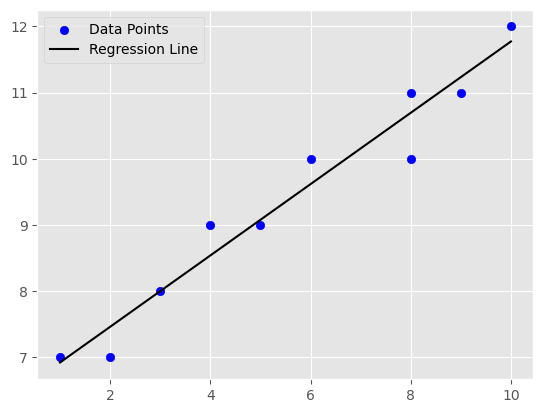

In [32]:
def best_fit(x_vals, y_vals):
    # Create a scatter plot of x vs. y
    fig, ax = plt.subplots()
    ax.scatter(x_vals, y_vals, color = 'b', label = "Data Points")
    # Calculate and print coefficient and intercept
    m = calc_slope(x_vals, y_vals)
    c = calc_intercept(m, x_vals, y_vals)
    print('Coefficient:', round(m, 2))
    print('Intercept:', round(c, 2))
    # Plot line created by coefficient and intercept
    regression_line = m * x_vals + c
    ax.plot(x_vals, regression_line, color = 'k', label = "Regression Line")
    ax.legend();
    
best_fit(X, Y)

So there we have it, our least squares regression line. This is the best fit line and does describe the data pretty well (still not perfect though). 

## Describe your Model Mathematically and in Words

What is the overall formula of the model you have created? How would you describe the slope and intercept, and what do they say about the relationship between x and y?

---

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
The overall formula is $y = 0.53x + 6.37$.
    
The intercept (where the line crosses the y-axis) is at 6.37. This means that if x is equal to 0, the value of y would be 6.37.
    
The slope of the line is 0.53. This means that every increase of 1 in the value of x is associated with an increase of 0.53 in the value of y.

</details>

In [ ]:
'''
The formula of the model I created is:
y = 0.54x + 6.38

The model states that with every change of 1 in the independent variable, the dependent variable will change by 0.54.
The model also states that when the independent variable is 0, the dependent variable will be 6.38.
'''

## Summary

In this lesson, you learned how to perform linear regression from scratch using NumPy methods. You first calculated the slope and intercept parameters of the regression line that best fit the data. You then used the regression line parameters to predict the value ($\hat y$-value) of a previously unseen feature ($x$-value). You finally plotted your model against the original dataset.